<a href="https://colab.research.google.com/github/cg-bond/PHSX-Lab-Bond/blob/main/color-cube-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

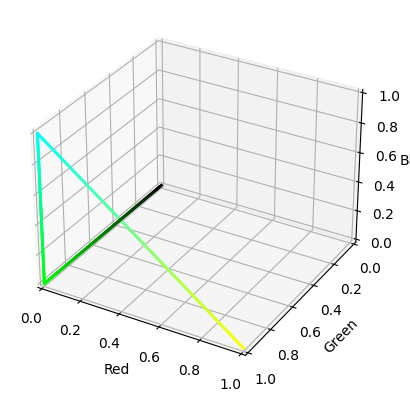

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import numpy as np

def interpolate_color(start_color, end_color, t):
    # Interpolate RGB values
    interpolated_color = [start + t * (end - start) for start, end in zip(start_color, end_color)]
    return interpolated_color

def draw_gradient_lines(ax):
    vertices = [
        [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 1]
    ]

    # Colors at the corners of the specified path
    colors_rgb = [
        [1, 1, 0],    # Yellow
        [0, 1, 1],    # Cyan
        [0, 1, 0],    # Blue
        [0, 0, 0]     # Black
    ]

    # Draw lines connecting the dots along the specified path
    for start_idx, end_idx in [(0, 1), (1, 2), (2, 3)]:
        start_color = colors_rgb[start_idx]
        end_color = colors_rgb[end_idx]
        line_colors = [interpolate_color(start_color, end_color, t) for t in np.linspace(0, 1, 100)]

        # Extract the RGB components
        line_colors = np.array(line_colors)
        r, g, b = line_colors[:, 0], line_colors[:, 1], line_colors[:, 2]

        # Draw the lines with color gradients
        for i in range(len(r) - 1):
            ax.plot([r[i], r[i+1]], [g[i], g[i+1]], [b[i], b[i+1]], color=line_colors[i], linewidth=2)

    # Set plot limits
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])

    # Invert the y-axis to place the origin at the bottom
    ax.invert_yaxis()

    # Set axis labels
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Draw lines connecting the dots along the specified path
draw_gradient_lines(ax)

# Show the plot
plt.show()
